In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

In [2]:
df = pd.read_csv('./train.csv')
X = np.asmatrix(df.drop('label', axis=1)) / 255
y = np.asarray(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [3]:
class ANN():
    def __init__(self, nhid, nunits):
        self.nhid = nhid
        self.nunits = nunits # a list of number of units for each layer
        self.weights = []
        self.bias =  []
        self.result = [None]* (self.nhid+2)
        self.delta =  [None]* (self.nhid+2)
        self.zs = [None] * (self.nhid+2)
        self.errors = []
        self.accuracies = []
        
    
    def forward(self, x):
        self.result[0] = np.array(x)
        for layer in range(1, self.nhid+2):
            z = self.result[layer-1]@self.weights[layer-1] + self.bias[layer-1]
            self.zs[layer] = np.array(z)
            result = self.sigmoid(z)
            self.result[layer] = np.array(result)
        return self.result[layer]
    
    def backward(self, x, y):
        self.delta[self.nhid+1] = self.dsigmoid(self.zs[self.nhid+1]) * (y - self.result[self.nhid+1])
        for layer in range(self.nhid, 0, -1):
            z = self.zs[layer]
            self.delta[layer] = (self.delta[layer+1]@self.weights[layer].T) * self.dsigmoid(z)
                
                
    def weights_update(self, alpha):
        for layer in range(self.nhid+1):
            self.weights[layer] += alpha * self.result[layer].T@self.delta[layer+1]
            self.bias[layer] += alpha * self.delta[layer+1]
    
    def fit(self, X, y, alpha, t):
        y = np.asarray(pd.get_dummies(y), dtype=float)
        m, n = X.shape
        self.param_init(X,y)
        for epoch in range(t):
            error =0
            for i in range(m):
                x = np.asarray(X[i,:])
                v = np.asarray(y[i,:]).reshape((1, len(y[i,:])))
                
                a = self.forward(x)
                self.backward(x, v)
                self.weights_update(alpha)
                error += np.sum((v-a)**2)
            accuracy = self.accuracy(X, y)  
            self.accuracies.append(accuracy)
            self.errors.append(error/len(X))
            if epoch%5 ==0:
                print('>epoch=%d,error=%.3f'%(epoch, error/len(X)))
#         return errors
                
            
    def predict(self, T):
        '''
        Input:
            T: test examples
            
        Output:
            class probability
        '''
        result = T
        for layer in range(1, self.nhid+2):
            z = result@self.weights[layer-1]
            result = self.sigmoid(z)
        return np.argmax(result, axis=1)
        
    def print(self):
        print(f'current weights: \n {self.weights}' \
             f'current bias: \n {self.bias}')
    
    def param_init(self, X, y):
        nin, nout = X.shape[1], self.nunits[0]
        self.weights.append(self.xavier_init(nin, nout))
        self.bias.append(self.xavier_init(1, nout))
        for i in range(self.nhid - 1):
            self.weights.append(self.xavier_init(self.nunits[i], self.nunits[i+1]))
            self.bias.append(self.xavier_init(1, self.nunits[i+1]))
        self.weights.append(self.xavier_init(self.nunits[-1], y.shape[1]))
        self.bias.append(self.xavier_init(1, y.shape[1]))
        
    def xavier_init(self, nin, nout):
        up = np.sqrt(6 / (nin + nout))
        low = -up
        return (up - low) * np.random.random_sample((nin, nout)) + low
    
    def accuracy(self, X, y):
        predictions = self.predict(X).T.ravel()
        predictions = np.squeeze(np.asarray(predictions))
        label = np.argmax(y, axis=1)
        return sum(predictions == label) / X.shape[0]
                
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def dsigmoid(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
            

In [42]:
ann = ANN(1, [32])

In [43]:
%%time
ALPHA = 0.1
EPOCH = 30
ann.fit(X_train, y_train, ALPHA, EPOCH)

>epoch=0,error=0.217
>epoch=5,error=0.074
>epoch=10,error=0.056
>epoch=15,error=0.046
>epoch=20,error=0.039
>epoch=25,error=0.034
CPU times: user 6min 26s, sys: 1min, total: 7min 26s
Wall time: 4min 9s


In [44]:
res = ann.predict(X_test).reshape(1,-1)
y = y_test.reshape(1,-1)
np.sum(res == y) / len(y_test)

0.9486666666666667

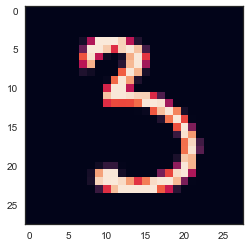

In [45]:
# plot some number
num = plt.imshow(X_train[1000,:].reshape(28,28))

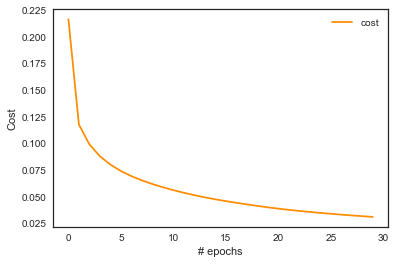

In [46]:
# plot the Training cost and Validation cost
epoches = np.arange(EPOCH)
plt.plot(epoches, ann.errors, color='darkorange', label="cost")
plt.xlabel('# epochs')
plt.ylabel('Cost')
legend = plt.legend(loc='best', shadow=True)

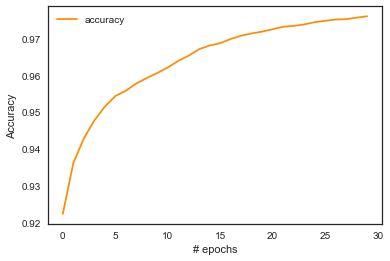

In [47]:
# plot the Training accuracy and Validation accuracy
plt.plot(epoches, ann.accuracies, color='darkorange', label="accuracy")
plt.xlabel('# epochs')
plt.ylabel('Accuracy')
legend = plt.legend(loc='best', shadow=True)

In [23]:
sum(np.array([1, 2]) == np.array([1, 2]))

2